In [2]:
import pandas as pd

In [3]:
orders = pd.read_csv ('orders.csv')
orders_products_prior = pd.read_csv ('order_products__prior.csv')
orders_products_train = pd.read_csv ('order_products__train.csv')
products = pd.read_csv ('products.csv')
aisles = pd.read_csv ('aisles.csv')
departments = pd.read_csv ('departments.csv')

# Exploratory Analysis

In [4]:
## Shape of the tables##
print('orders shape:', orders.shape)
print('orders products prior shape:', orders_products_prior.shape)
print('orders products train shape:', orders_products_train.shape)
print('products shape:', products.shape)
print('aisles shape:', aisles.shape)
print('departments shape:', departments.shape)

orders shape: (3421083, 7)
orders products prior shape: (32434489, 4)
orders products train shape: (1384617, 4)
products shape: (49688, 4)
aisles shape: (134, 2)
departments shape: (21, 2)


In [5]:
print('orders', orders.columns)

orders Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


In [6]:
print('orders products prior shape:', orders_products_prior.columns)

orders products prior shape: Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [7]:
print('orders products train shape:', orders_products_train.columns)

orders products train shape: Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [8]:
print('products shape:', products.columns)

products shape: Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [9]:
print('aisles shape:', aisles.columns)

aisles shape: Index(['aisle_id', 'aisle'], dtype='object')


In [10]:
print('departments shape:', departments.columns)

departments shape: Index(['department_id', 'department'], dtype='object')


In [11]:
#Key Columns#
#orders = order_id
#orders_products_prior = order_id, product_id
#orders_products_train = order_id, product_id
#products = product_id, aisle_id, department_id
#aisles = aisles_id
#departments = department_id

In [12]:
##Missing Values##

In [13]:
orders.isna().any().any()

True

In [14]:
orders.columns[orders.isnull().any()]

Index(['days_since_prior_order'], dtype='object')

In [15]:
orders.isna().sum().sum()

206209

In [16]:
orders_products_prior.isna().any().any()

False

In [17]:
orders_products_train.isna().any().any()

False

In [18]:
products.isna().any().any()

False

In [19]:
aisles.isna().any().any()

False

In [20]:
departments.isna().any().any()

False

In [21]:
##Only orders has missing values, column: days_since_prior_order, number of missing values: 206,209##

In [22]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
for col in orders:
    print(orders['eval_set'].unique())

['prior' 'train' 'test']
['prior' 'train' 'test']
['prior' 'train' 'test']
['prior' 'train' 'test']
['prior' 'train' 'test']
['prior' 'train' 'test']
['prior' 'train' 'test']


In [24]:
#Merging Tables#
prior_train_orders_1 = pd.concat([orders_products_prior, orders_products_train]).sort_values(by=['order_id'])
prior_train_orders_1

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
...,...,...,...,...
32434483,3421083,35211,5,0
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0


In [25]:
prior_train_orders_2 = pd.merge(left = prior_train_orders_1, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id'])
prior_train_orders_2

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
124787,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
125464,1,13176,6,0,Bag of Organic Bananas,24,4
520394,1,47209,7,0,Organic Hass Avocado,24,4
741271,1,22035,8,1,Organic Whole String Cheese,21,16
...,...,...,...,...,...,...,...
32713065,3421083,35211,5,0,Organic Strawberry & Mango Dried Tiny Fruits,92,18
16651303,3421083,21162,3,0,Organic Mixed Berry Yogurt & Fruit Snack,92,18
29224494,3421083,7854,1,0,Freeze Dried Mango Slices,117,19
24800453,3421083,45309,2,0,Purple Carrot & blueberry Puffs,92,18


In [26]:
prior_train_orders_3 = pd.merge(left = prior_train_orders_2, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id'])
prior_train_orders_3

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1577871,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits
5370531,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese
6391993,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses
6712820,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables
...,...,...,...,...,...,...,...,...
5370530,3421083,24852,9,1,Banana,24,4,fresh fruits
28513145,3421083,7854,1,0,Freeze Dried Mango Slices,117,19,nuts seeds dried fruit
27298174,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast
24320143,3421083,45309,2,0,Purple Carrot & blueberry Puffs,92,18,baby food formula


In [27]:
prior_train_orders_4 = pd.merge(left = prior_train_orders_3, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id'])
prior_train_orders_4

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
5631069,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
5631070,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
15519445,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
5631068,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
...,...,...,...,...,...,...,...,...,...
32967433,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
33406174,3421083,35211,5,0,Organic Strawberry & Mango Dried Tiny Fruits,92,18,baby food formula,babies
33406175,3421083,45309,2,0,Purple Carrot & blueberry Puffs,92,18,baby food formula,babies
33406176,3421083,18176,4,1,Organic Strawberry Yogurt & Fruit Snack,92,18,baby food formula,babies


In [28]:
prior_train_orders_5 = pd.merge(left = prior_train_orders_4, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id'])
prior_train_orders_5

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819098,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0
33819097,3421083,5020,10,1,Organic Sweet & Salty Peanut Pretzel Granola ...,3,19,energy granola bars,snacks,25247,prior,24,2,6,21.0
33819096,3421083,21162,3,0,Organic Mixed Berry Yogurt & Fruit Snack,92,18,baby food formula,babies,25247,prior,24,2,6,21.0
33819099,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0


In [29]:
prior_train_orders_5.isna().sum().sum()

2078068

In [30]:
prior_train_orders_5.columns[prior_train_orders_5.isnull().any()]

Index(['days_since_prior_order'], dtype='object')

In [31]:
prior_train_orders_5.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,7.121799e+01,9.918544e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,3.819898e+01,6.281655e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [32]:
count_eval_set_1 = prior_train_orders_5.eval_set.value_counts()
count_eval_set_1

prior    32434489
train     1384617
Name: eval_set, dtype: int64

In [33]:
#Type of orders per User#
print('Total Users:', orders['user_id'].nunique())

Total Users: 206209


In [34]:
print('Users Train:', orders[orders['eval_set']=='train']['user_id'].nunique())

Users Train: 131209


In [35]:
print('Users Test:', orders[orders['eval_set']=='test']['user_id'].nunique())

Users Test: 75000


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [37]:
#Number of orders per User#
count_orders = orders.groupby(['user_id'])['order_id'].agg(lambda group: len(group.unique())).reset_index(name = 'count_orders').set_index('user_id')

In [38]:
count_orders

,count_orders
user_id,
1,11
2,15
3,13
4,6
5,5
...,...
206205,4
206206,68
206207,17


In [39]:
count_orders.mean()

count_orders    16.590367
dtype: float64

In [40]:
print('Minimum orders per user:', count_orders['count_orders'].min())

Minimum orders per user: 4


In [41]:
print('Maximun orders per user:', count_orders['count_orders'].max())

Maximun orders per user: 100


In [42]:
#Most frequently ordered products#
count_products = prior_train_orders_5['product_name'].value_counts().reset_index().head(15)
count_products.columns = ['product_name', 'frequency_count']
count_products

,product_name,frequency_count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


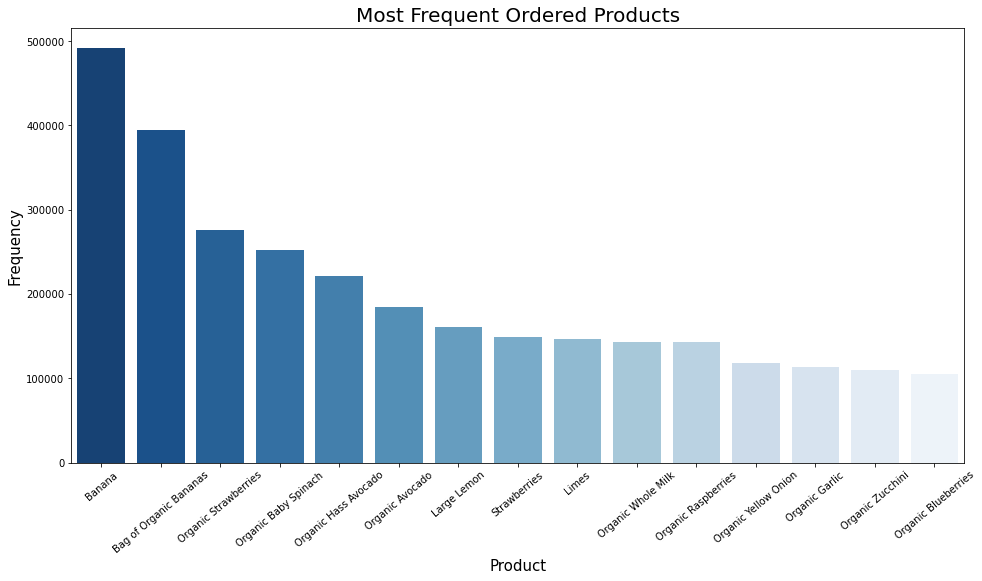

In [43]:
plt.figure(figsize=(16,8))
sns.barplot(x = count_products['product_name'], y = count_products['frequency_count'], alpha = 1, palette = 'Blues_r')
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Product', fontsize = 15)
plt.xticks(rotation = 40)
plt.title('Most Frequent Ordered Products', fontsize = 20)
plt.show()

In [44]:
print('Total aisles {} '.format(prior_train_orders_5['aisle'].nunique()))

Total aisles 134 


In [45]:
#Most frequently ordered products by aisle#
count_products_aisle = prior_train_orders_5['aisle'].value_counts().reset_index().head(15)
count_products_aisle.columns = ['aisle', 'frequency_count']
count_products_aisle

,aisle,frequency_count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


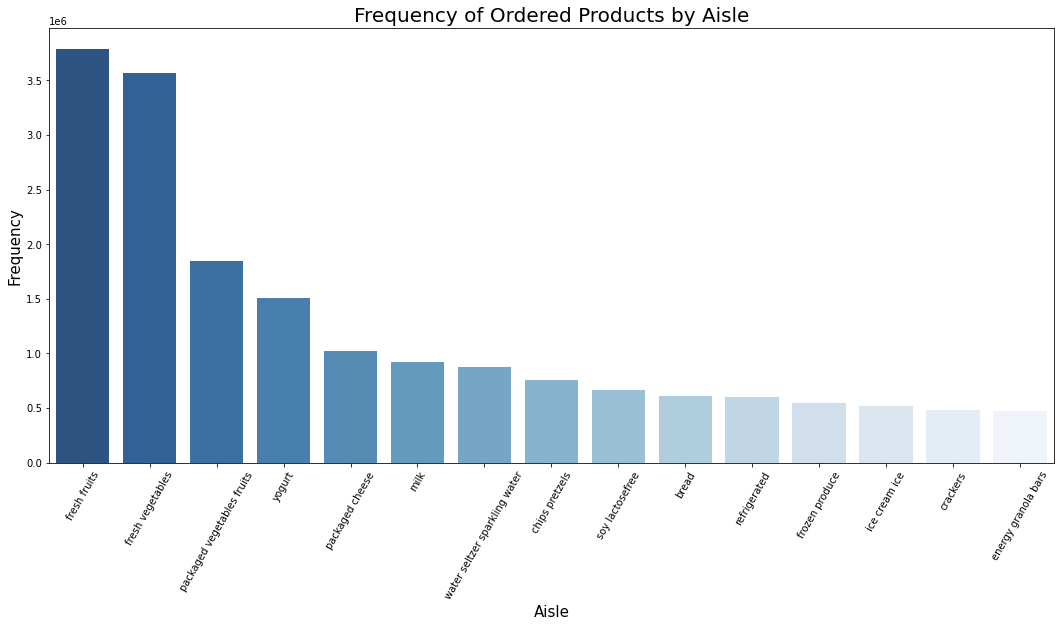

In [46]:
plt.figure(figsize=(18,8))
sns.barplot(x = count_products_aisle['aisle'], y = count_products_aisle['frequency_count'], alpha=0.9, palette='Blues_r')
plt.ylabel('Frequency', fontsize= 15)
plt.xlabel('Aisle', fontsize= 15)
plt.xticks(rotation= 60)
plt.title('Frequency of Ordered Products by Aisle', fontsize = 20)
plt.show()

In [47]:
print('Total departments {} '.format(prior_train_orders_5['department'].nunique()))

Total departments 21 


In [48]:
#Most frequently ordered products by department#
count_products_department = prior_train_orders_5['department'].value_counts().reset_index()
count_products_department.columns = ['Department', 'Frequency']
count_products_department

,Department,Frequency
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


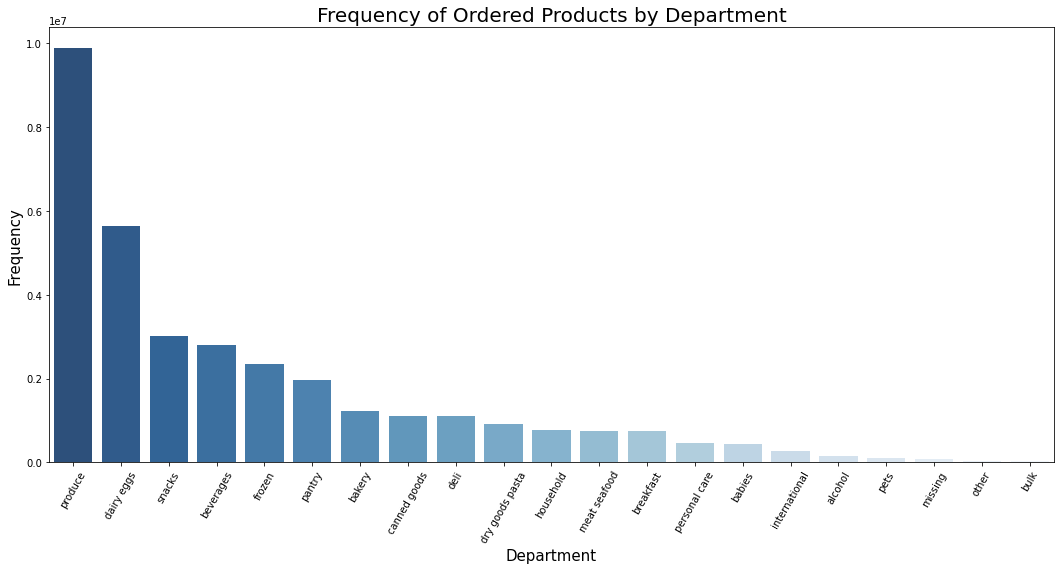

In [49]:
plt.figure(figsize=(18,8))
sns.barplot(x = count_products_department['Department'], y = count_products_department['Frequency'], alpha=0.9, palette= 'Blues_r')
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Department', fontsize = 15)
plt.xticks(rotation= 60)
plt.title('Frequency of Ordered Products by Department', fontsize = 20)
plt.show()

In [50]:
#Frequency of ordered products by weekday#
print(prior_train_orders_5['order_dow'].unique())

[4 5 1 6 2 0 3]


In [51]:
count_order_weekday = prior_train_orders_5['order_dow'].value_counts().reset_index()
count_order_weekday.columns = ['Day of Week', 'Frequency']
count_order_weekday = count_order_weekday.sort_values(by=['Day of Week'])
count_order_weekday

,Day of Week,Frequency
0,0,6533692
1,1,5871834
4,2,4378360
5,3,3998498
6,4,3942696
3,5,4386443
2,6,4707583


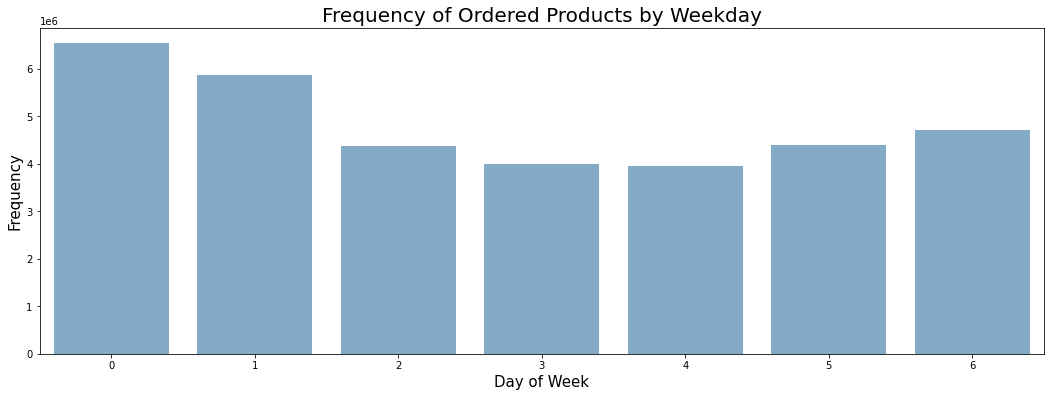

In [52]:
plt.figure(figsize=(18,6))
sns.barplot(x = count_order_weekday['Day of Week'], y = count_order_weekday['Frequency'], alpha=0.6, color = color[0])
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Day of Week', fontsize = 15)
plt.xticks(rotation= 'horizontal')
plt.title('Frequency of Ordered Products by Weekday', fontsize = 20)
plt.show()

In [53]:
#Frequency of ordered products by hour#
count_order_hour = prior_train_orders_5['order_hour_of_day'].value_counts().reset_index()
count_order_hour.columns = ['order_hour_of_day', 'frequency']
count_order_hour = count_order_hour.sort_values(by=['order_hour_of_day'])
count_order_hour

,order_hour_of_day,frequency
18,0,228031
19,1,121412
21,2,72660
23,3,53759
22,4,55714
20,5,91909
17,6,302642
13,7,928239
9,8,1787359
7,9,2550569


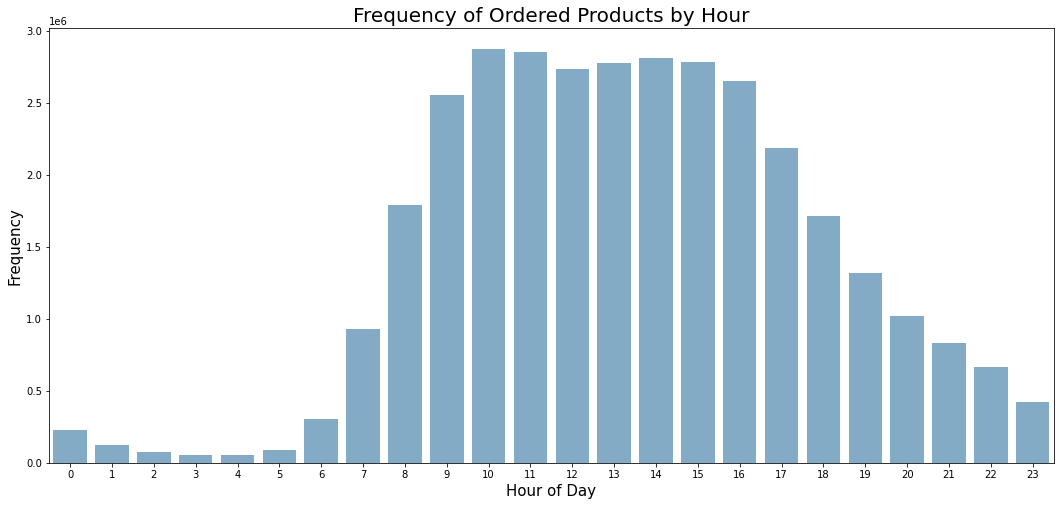

In [54]:
plt.figure(figsize=(18, 8))
sns.barplot(x = count_order_hour['order_hour_of_day'], y = count_order_hour['frequency'], alpha=0.6, color = color[0])
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Hour of Day', fontsize = 15)
plt.xticks(rotation= 'horizontal')
plt.title('Frequency of Ordered Products by Hour', fontsize = 20)
plt.show()

<AxesSubplot:>

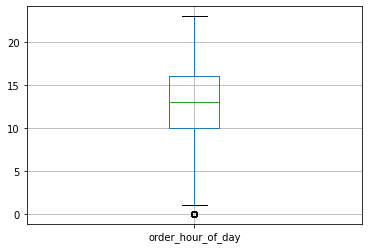

In [55]:
orders.boxplot('order_hour_of_day')

In [56]:
#Frequency of ordered products by Day and Hour#
day_hour = orders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].aggregate('count').reset_index()
day_hour = day_hour.pivot('order_dow', 'order_hour_of_day', 'order_id')
day_hour 

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


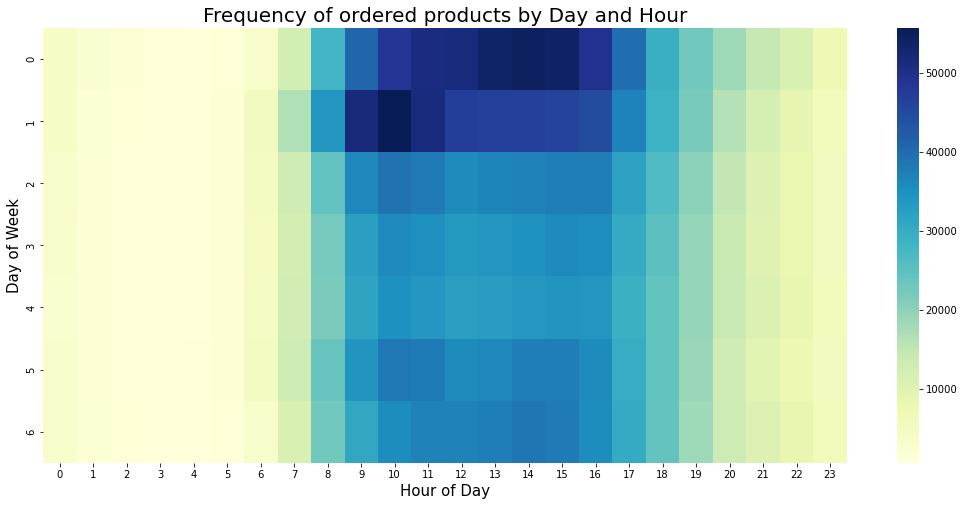

In [57]:
plt.figure(figsize = (18,8))
sns.heatmap(day_hour, cmap="YlGnBu")
plt.ylabel('Day of Week', fontsize = 15)
plt.xlabel('Hour of Day', fontsize = 15)
plt.title('Frequency of ordered products by Day and Hour', fontsize = 20)
plt.show()

In [58]:
#Frequency distribution by days since last order#
count_days_since_prior_order = prior_train_orders_5['days_since_prior_order'].value_counts().reset_index()
count_days_since_prior_order.columns = ['days_since_prior_order', 'frequency']
count_days_since_prior_order = count_days_since_prior_order.sort_values(by=['days_since_prior_order'])
count_days_since_prior_order

,days_since_prior_order,frequency
18,0.0,465742
11,1.0,960381
7,2.0,1492379
6,3.0,1914431
4,4.0,2126287
3,5.0,2180537
2,6.0,2592077
0,7.0,3586305
5,8.0,1995636
8,9.0,1262383


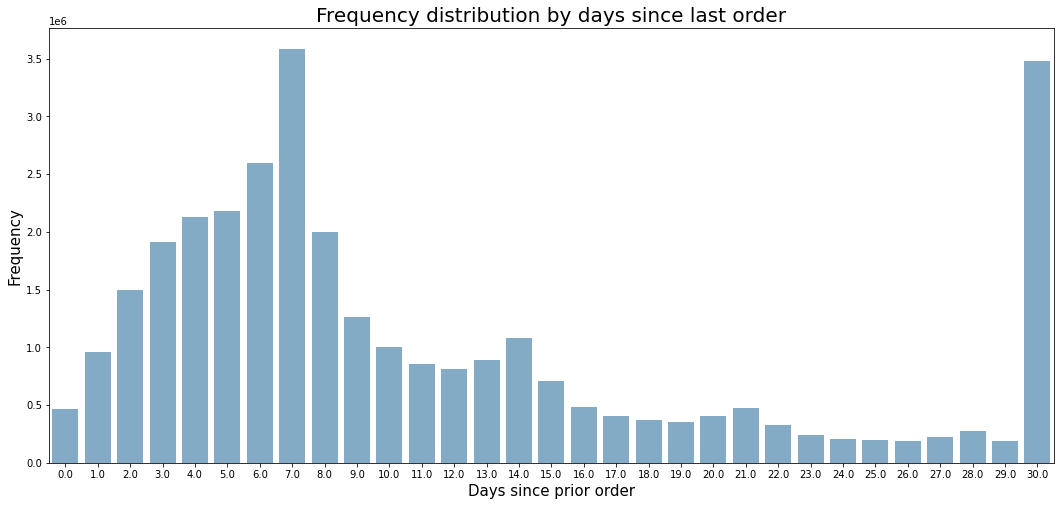

In [59]:
plt.figure(figsize = (18,8))
sns.barplot(data = count_days_since_prior_order, x = 'days_since_prior_order', \
            y = 'frequency', alpha = 0.6, color = color[0] )
plt.xlabel('Days since prior order', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Frequency distribution by days since last order', fontsize = 20)
plt.show()

<AxesSubplot:>

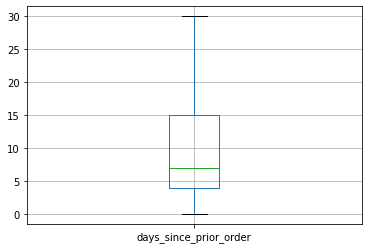

In [60]:
orders.boxplot('days_since_prior_order')

In [61]:
#Frequency of orders per Customer#
order_number_count = orders['order_number'].value_counts().reset_index()
order_number_count.columns = ['order_number', 'frequency']
order_number_count = order_number_count.sort_values(by=['order_number'])
order_number_count

,order_number,frequency
0,1,206209
1,2,206209
2,3,206209
3,4,206209
4,5,182223
...,...,...
95,96,1592
96,97,1525
97,98,1471
98,99,1421


In [62]:
rg = list(range(0,101,10))
rg

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

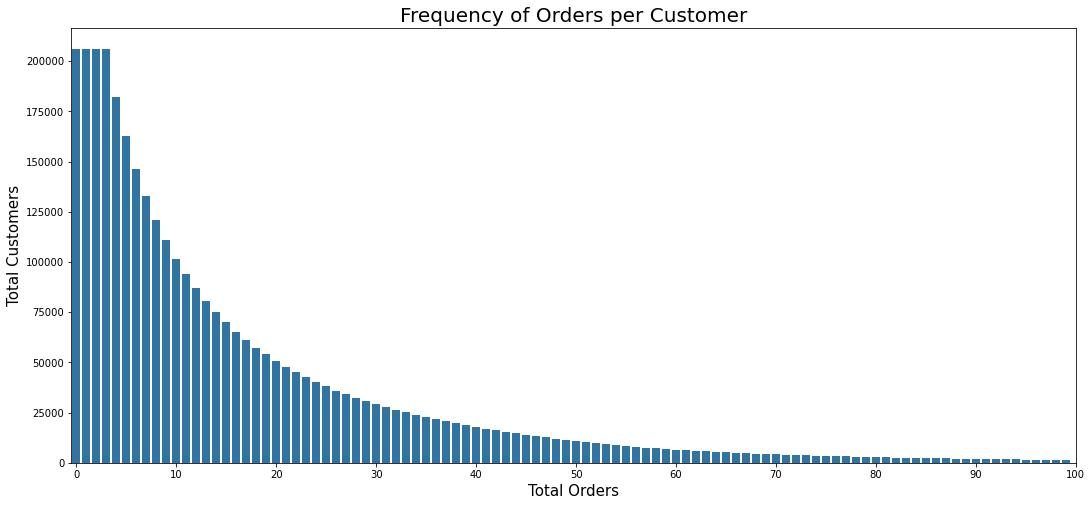

In [63]:
plt.figure(figsize=(18, 8))
graph = sns.barplot(x ='order_number', y = 'frequency', data = order_number_count, color= color[0])
graph.set(xticks = list( range(0,101,10) ), xticklabels = list( range(0,101,10) ) )
plt.ylabel('Total Customers', fontsize=15)
plt.xlabel('Total Orders', fontsize=15)
plt.title('Frequency of Orders per Customer', fontsize = 20)
plt.show()

In [64]:
#Percentage of Reordered Products#
count_reordered = prior_train_orders_5.groupby('order_id')['reordered'].aggregate('sum').reset_index()
count_reordered['reordered'].loc[count_reordered['reordered']>1] = 1
count_reordered.reordered.value_counts()/count_reordered.shape[0]

1    0.881319
0    0.118681
Name: reordered, dtype: float64

# Featuring Engineering 

In [65]:
#Reshaping the Data#
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')

In [66]:
#Probability of reordered a product by customer#
#Merging orders & orders_products_prior# 
orders_products = orders.merge(orders_products_prior, on = 'order_id', how= 'inner')
orders_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


In [67]:
#Number of orders per user#
user_id = orders_products.groupby('user_id')['order_number'].max().to_frame('total_orders').reset_index()
user_id

,user_id,total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4
...,...,...
206204,206205,3
206205,206206,67
206206,206207,16
206207,206208,49


In [68]:
user_id.index

RangeIndex(start=0, stop=206209, step=1)

In [69]:
#Mean of reordered per user# How frequent user has reordered a product
u_reorder = orders_products.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio').reset_index()
u_reorder

,user_id,u_reordered_ratio
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378
...,...,...
206204,206205,0.250000
206205,206206,0.473684
206206,206207,0.587444
206207,206208,0.707533


In [70]:
user_id = user_id.merge(u_reorder, on = 'user_id', how = 'left')
user_id

,user_id,total_orders,u_reordered_ratio
0,1,10,0.694915
1,2,14,0.476923
2,3,12,0.625000
3,4,5,0.055556
4,5,4,0.378378
...,...,...,...
206204,206205,3,0.250000
206205,206206,67,0.473684
206206,206207,16,0.587444
206207,206208,49,0.707533


In [71]:
#Number of purchases for each product#
p_product = orders_products['product_id'].value_counts().reset_index()
p_product.columns = ['product_id', 'frequency of purchases']
p_product

,product_id,frequency of purchases
0,24852,472565
1,13176,379450
2,21137,264683
3,21903,241921
4,47209,213584
...,...,...
49672,11356,1
49673,34463,1
49674,2769,1
49675,16461,1


In [72]:
#Probability for a product to be reordered#
p_reorder = orders_products.groupby('product_id')['reordered'].mean().to_frame('p_reordered_ratio').reset_index()
p_reorder

,product_id,p_reordered_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,5,0.600000
...,...,...
49672,49684,0.111111
49673,49685,0.122449
49674,49686,0.700000
49675,49687,0.461538


In [73]:
#Merge the p_reordered_ratio and the frequency of purchases#
p_product_reordered = p_product.merge(p_reorder, on= 'product_id', how = 'left')
p_product_reordered

,product_id,frequency of purchases,p_reordered_ratio
0,24852,472565,0.843501
1,13176,379450,0.832555
2,21137,264683,0.777704
3,21903,241921,0.772500
4,47209,213584,0.796553
...,...,...,...
49672,11356,1,0.000000
49673,34463,1,0.000000
49674,2769,1,0.000000
49675,16461,1,0.000000


In [74]:
p_product_reordered.isna().any().any()

False

In [75]:
#Frequency of product purchases by user#
uxp = orders_products.groupby('user_id')['product_id'].value_counts().to_frame('total_bought').reset_index()
uxp

,user_id,product_id,total_bought
0,1,196,10
1,1,12427,10
2,1,10258,9
3,1,25133,8
4,1,13032,3
...,...,...,...
13307948,206209,40310,1
13307949,206209,41665,1
13307950,206209,44325,1
13307951,206209,48370,1


In [76]:
#Probability of reordered a product by user# NUME
times = orders_products.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought']
times

Times_Bought
user_id product_id              
1       196                   10
        10258                  9
        10326                  1
        12427                 10
        13032                  3
...                          ...
206209  43961                  3
        44325                  1
        48370                  1
        48697                  1
        48742                  2

[13307953 rows x 1 columns]

In [77]:
#Calculate first order that customer purchase a product# DENO
first_order = orders_products.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_n').reset_index()
first_order

,user_id,product_id,first_order_n
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2
...,...,...,...
13307948,206209,43961,4
13307949,206209,44325,7
13307950,206209,48370,11
13307951,206209,48697,7


In [78]:
total_orders = orders_products.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders

,total_orders
user_id,
1,10
2,14
3,12
4,5
5,4
...,...
206205,3
206206,67
206207,16


In [79]:
first_order_total_orders = first_order.merge(total_orders, on = 'user_id', how = 'right')
first_order_total_orders

,user_id,product_id,first_order_n,total_orders
0,1,196,1,10
1,1,10258,2,10
2,1,10326,5,10
3,1,12427,1,10
4,1,13032,2,10
...,...,...,...,...
13307948,206209,43961,4,13
13307949,206209,44325,7,13
13307950,206209,48370,11,13
13307951,206209,48697,7,13


In [80]:
#Calculate the total orders since the first user's order of a product#
first_order_total_orders['Order_range'] = first_order_total_orders.total_orders - first_order_total_orders.first_order_n + 1
first_order_total_orders

,user_id,product_id,first_order_n,total_orders,Order_range
0,1,196,1,10,10
1,1,10258,2,10,9
2,1,10326,5,10,6
3,1,12427,1,10,10
4,1,13032,2,10,9
...,...,...,...,...,...
13307948,206209,43961,4,13,10
13307949,206209,44325,7,13,7
13307950,206209,48370,11,13,3
13307951,206209,48697,7,13,7


In [81]:
uxp_ratio = pd.merge(times, first_order_total_orders, on=['user_id', 'product_id'], how = 'left')
uxp_ratio

,user_id,product_id,Times_Bought,first_order_n,total_orders,Order_range
0,1,196,10,1,10,10
1,1,10258,9,2,10,9
2,1,10326,1,5,10,6
3,1,12427,10,1,10,10
4,1,13032,3,2,10,9
...,...,...,...,...,...,...
13307948,206209,43961,3,4,13,10
13307949,206209,44325,1,7,13,7
13307950,206209,48370,1,11,13,3
13307951,206209,48697,1,7,13,7


In [82]:
#Divide the Times Bought by the Order_range#
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought/uxp_ratio.Order_range
uxp_ratio

,user_id,product_id,Times_Bought,first_order_n,total_orders,Order_range,uxp_reorder_ratio
0,1,196,10,1,10,10,1.000000
1,1,10258,9,2,10,9,1.000000
2,1,10326,1,5,10,6,0.166667
3,1,12427,10,1,10,10,1.000000
4,1,13032,3,2,10,9,0.333333
...,...,...,...,...,...,...,...
13307948,206209,43961,3,4,13,10,0.300000
13307949,206209,44325,1,7,13,7,0.142857
13307950,206209,48370,1,11,13,3,0.333333
13307951,206209,48697,1,7,13,7,0.142857


In [83]:
uxp_ratio = uxp_ratio.drop(['Times_Bought', 'Order_range', 'total_orders', 'first_order_n'], axis=1)

In [84]:
uxp_ratio

,user_id,product_id,uxp_reorder_ratio
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333
...,...,...,...
13307948,206209,43961,0.300000
13307949,206209,44325,0.142857
13307950,206209,48370,0.333333
13307951,206209,48697,0.142857


In [85]:
#Combine total purchases by user and probability of purchase#
uxp = uxp.merge(uxp_ratio, on= ['user_id', 'product_id'], how = 'left')
uxp

,user_id,product_id,total_bought,uxp_reorder_ratio
0,1,196,10,1.000000
1,1,12427,10,1.000000
2,1,10258,9,1.000000
3,1,25133,8,1.000000
4,1,13032,3,0.333333
...,...,...,...,...
13307948,206209,40310,1,0.333333
13307949,206209,41665,1,0.100000
13307950,206209,44325,1,0.142857
13307951,206209,48370,1,0.333333


In [86]:
orders_products[orders_products.user_id==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [87]:
#Merging all the features#
df = uxp.merge(user_id, on = 'user_id', how = 'left')
df

,user_id,product_id,total_bought,uxp_reorder_ratio,total_orders,u_reordered_ratio
0,1,196,10,1.000000,10,0.694915
1,1,12427,10,1.000000,10,0.694915
2,1,10258,9,1.000000,10,0.694915
3,1,25133,8,1.000000,10,0.694915
4,1,13032,3,0.333333,10,0.694915
...,...,...,...,...,...,...
13307948,206209,40310,1,0.333333,13,0.472868
13307949,206209,41665,1,0.100000,13,0.472868
13307950,206209,44325,1,0.142857,13,0.472868
13307951,206209,48370,1,0.333333,13,0.472868


In [88]:
df = df.merge(p_product_reordered, on = 'product_id', how = 'left')
df

,user_id,product_id,total_bought,uxp_reorder_ratio,total_orders,u_reordered_ratio,frequency of purchases,p_reordered_ratio
0,1,196,10,1.000000,10,0.694915,35791,0.776480
1,1,12427,10,1.000000,10,0.694915,6476,0.740735
2,1,10258,9,1.000000,10,0.694915,1946,0.713772
3,1,25133,8,1.000000,10,0.694915,6196,0.740155
4,1,13032,3,0.333333,10,0.694915,3751,0.657158
...,...,...,...,...,...,...,...,...
13307948,206209,40310,1,0.333333,13,0.472868,20069,0.637401
13307949,206209,41665,1,0.100000,13,0.472868,18367,0.641858
13307950,206209,44325,1,0.142857,13,0.472868,3485,0.401148
13307951,206209,48370,1,0.333333,13,0.472868,3934,0.699288


# Modelling

In [89]:
orders_train_test = orders[((orders.eval_set == 'train')|(orders.eval_set == 'test'))]
orders_train_test = orders_train_test.drop(['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order' ], axis=1)
orders_train_test

,order_id,user_id,eval_set
10,1187899,1,train
25,1492625,2,train
38,2774568,3,test
44,329954,4,test
49,2196797,5,train
...,...,...,...
3420933,1716008,206205,train
3421001,1043943,206206,test
3421018,2821651,206207,test
3421068,803273,206208,test


In [90]:
df = df.merge(orders_train_test, how = 'left', on = 'user_id')
df

,user_id,product_id,total_bought,uxp_reorder_ratio,total_orders,u_reordered_ratio,frequency of purchases,p_reordered_ratio,order_id,eval_set
0,1,196,10,1.000000,10,0.694915,35791,0.776480,1187899,train
1,1,12427,10,1.000000,10,0.694915,6476,0.740735,1187899,train
2,1,10258,9,1.000000,10,0.694915,1946,0.713772,1187899,train
3,1,25133,8,1.000000,10,0.694915,6196,0.740155,1187899,train
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,1187899,train
...,...,...,...,...,...,...,...,...,...,...
13307948,206209,40310,1,0.333333,13,0.472868,20069,0.637401,272231,train
13307949,206209,41665,1,0.100000,13,0.472868,18367,0.641858,272231,train
13307950,206209,44325,1,0.142857,13,0.472868,3485,0.401148,272231,train
13307951,206209,48370,1,0.333333,13,0.472868,3934,0.699288,272231,train


In [91]:
#Preparing the model with train data#
df_train = df[df.eval_set =='train']
df_train

,user_id,product_id,total_bought,uxp_reorder_ratio,total_orders,u_reordered_ratio,frequency of purchases,p_reordered_ratio,order_id,eval_set
0,1,196,10,1.000000,10,0.694915,35791,0.776480,1187899,train
1,1,12427,10,1.000000,10,0.694915,6476,0.740735,1187899,train
2,1,10258,9,1.000000,10,0.694915,1946,0.713772,1187899,train
3,1,25133,8,1.000000,10,0.694915,6196,0.740155,1187899,train
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,1187899,train
...,...,...,...,...,...,...,...,...,...,...
13307948,206209,40310,1,0.333333,13,0.472868,20069,0.637401,272231,train
13307949,206209,41665,1,0.100000,13,0.472868,18367,0.641858,272231,train
13307950,206209,44325,1,0.142857,13,0.472868,3485,0.401148,272231,train
13307951,206209,48370,1,0.333333,13,0.472868,3934,0.699288,272231,train


In [92]:
print('Train data:', df_train.shape)

Train data: (8474661, 10)


In [93]:
#Adding the reorderd column#
df_train = df_train.merge(orders_products_train[['product_id', 'order_id', 'reordered']], on = ['product_id', 'order_id'], how = 'left')
df_train

,user_id,product_id,total_bought,uxp_reorder_ratio,total_orders,u_reordered_ratio,frequency of purchases,p_reordered_ratio,order_id,eval_set,reordered
0,1,196,10,1.000000,10,0.694915,35791,0.776480,1187899,train,1.0
1,1,12427,10,1.000000,10,0.694915,6476,0.740735,1187899,train,NaN
2,1,10258,9,1.000000,10,0.694915,1946,0.713772,1187899,train,1.0
3,1,25133,8,1.000000,10,0.694915,6196,0.740155,1187899,train,1.0
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,1187899,train,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8474656,206209,40310,1,0.333333,13,0.472868,20069,0.637401,272231,train,NaN
8474657,206209,41665,1,0.100000,13,0.472868,18367,0.641858,272231,train,NaN
8474658,206209,44325,1,0.142857,13,0.472868,3485,0.401148,272231,train,NaN
8474659,206209,48370,1,0.333333,13,0.472868,3934,0.699288,272231,train,NaN


In [94]:
#Replacing missing values with 0 because they were not bought#
df_train['reordered'] = df_train['reordered'].fillna(0)
df_train

,user_id,product_id,total_bought,uxp_reorder_ratio,total_orders,u_reordered_ratio,frequency of purchases,p_reordered_ratio,order_id,eval_set,reordered
0,1,196,10,1.000000,10,0.694915,35791,0.776480,1187899,train,1.0
1,1,12427,10,1.000000,10,0.694915,6476,0.740735,1187899,train,0.0
2,1,10258,9,1.000000,10,0.694915,1946,0.713772,1187899,train,1.0
3,1,25133,8,1.000000,10,0.694915,6196,0.740155,1187899,train,1.0
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,1187899,train,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8474656,206209,40310,1,0.333333,13,0.472868,20069,0.637401,272231,train,0.0
8474657,206209,41665,1,0.100000,13,0.472868,18367,0.641858,272231,train,0.0
8474658,206209,44325,1,0.142857,13,0.472868,3485,0.401148,272231,train,0.0
8474659,206209,48370,1,0.333333,13,0.472868,3934,0.699288,272231,train,0.0


In [95]:
df_train = df_train.set_index(['user_id', 'product_id'])
df_train

total_bought  uxp_reorder_ratio  total_orders  \
user_id product_id                                                  
1       196                   10           1.000000            10   
        12427                 10           1.000000            10   
        10258                  9           1.000000            10   
        25133                  8           1.000000            10   
        13032                  3           0.333333            10   
...                          ...                ...           ...   
206209  40310                  1           0.333333            13   
        41665                  1           0.100000            13   
        44325                  1           0.142857            13   
        48370                  1           0.333333            13   
        48697                  1           0.142857            13   

                    u_reordered_ratio  frequency of purchases  \
user_id product_id                                              
1       196                  0.694915                   35791   
        12427                0.694915                    6476   
        10258                0.694915                    1946   
        25133                0.694915                    6196   
        13032                0.694915                    3751   
...                               ...                     ...   
206209  40310                0.472868                   20069   
        41665                0.472868                   18367   
        44325                0.472868                    3485   
        48370                0.472868                    3934   
        48697                0.472868                    9783   

                    p_reordered_ratio  order_id eval_set  reordered  
user_id product_id                                                   
1       196                  0.776480   1187899    train        1.0  
        12427                0.740735   1187899    train        0.0  
        10258                0.713772   1187899    train        1.0  
        25133                0.740155   1187899    train        1.0  
        13032                0.657158   1187899    train        1.0  
...                               ...       ...      ...        ...  
206209  40310                0.637401    272231    train        0.0  
        41665                0.641858    272231    train        0.0  
        44325                0.401148    272231    train        0.0  
        48370                0.699288    272231    train        0.0  
        48697                0.357661    272231    train        0.0  

[8474661 rows x 9 columns]

In [96]:
#Removing columns that are not predictors 'eval_set', 'order_id'#
df_train = df_train.drop(['eval_set', 'order_id'], axis = 1)
df_train

total_bought  uxp_reorder_ratio  total_orders  \
user_id product_id                                                  
1       196                   10           1.000000            10   
        12427                 10           1.000000            10   
        10258                  9           1.000000            10   
        25133                  8           1.000000            10   
        13032                  3           0.333333            10   
...                          ...                ...           ...   
206209  40310                  1           0.333333            13   
        41665                  1           0.100000            13   
        44325                  1           0.142857            13   
        48370                  1           0.333333            13   
        48697                  1           0.142857            13   

                    u_reordered_ratio  frequency of purchases  \
user_id product_id                                              
1       196                  0.694915                   35791   
        12427                0.694915                    6476   
        10258                0.694915                    1946   
        25133                0.694915                    6196   
        13032                0.694915                    3751   
...                               ...                     ...   
206209  40310                0.472868                   20069   
        41665                0.472868                   18367   
        44325                0.472868                    3485   
        48370                0.472868                    3934   
        48697                0.472868                    9783   

                    p_reordered_ratio  reordered  
user_id product_id                                
1       196                  0.776480        1.0  
        12427                0.740735        0.0  
        10258                0.713772        1.0  
        25133                0.740155        1.0  
        13032                0.657158        1.0  
...                               ...        ...  
206209  40310                0.637401        0.0  
        41665                0.641858        0.0  
        44325                0.401148        0.0  
        48370                0.699288        0.0  
        48697                0.357661        0.0  

[8474661 rows x 7 columns]

In [97]:
#Preparing the model with test data#
df_test = df[df.eval_set== 'test']
df_test

,user_id,product_id,total_bought,uxp_reorder_ratio,total_orders,u_reordered_ratio,frequency of purchases,p_reordered_ratio,order_id,eval_set
120,3,39190,10,0.833333,12,0.625000,10972,0.573642,2774568,test
121,3,47766,9,0.750000,12,0.625000,176815,0.758103,2774568,test
122,3,21903,8,0.666667,12,0.625000,241921,0.772500,2774568,test
123,3,9387,5,0.416667,12,0.625000,36187,0.650427,2774568,test
124,3,17668,5,0.416667,12,0.625000,2110,0.578199,2774568,test
...,...,...,...,...,...,...,...,...,...,...
13307880,206208,48364,1,0.021277,49,0.707533,19501,0.530127,803273,test
13307881,206208,48865,1,0.125000,49,0.707533,802,0.394015,803273,test
13307882,206208,49247,1,0.022727,49,0.707533,6292,0.654641,803273,test
13307883,206208,49385,1,0.043478,49,0.707533,318,0.179245,803273,test


In [98]:
print('Test data:', df_test.shape)

Test data: (4833292, 10)


In [99]:
print('Train data:', df_train.shape)

Train data: (8474661, 7)


In [100]:
df_test = df_test.set_index(['user_id', 'product_id'])
df_test

total_bought  uxp_reorder_ratio  total_orders  \
user_id product_id                                                  
3       39190                 10           0.833333            12   
        47766                  9           0.750000            12   
        21903                  8           0.666667            12   
        9387                   5           0.416667            12   
        17668                  5           0.416667            12   
...                          ...                ...           ...   
206208  48364                  1           0.021277            49   
        48865                  1           0.125000            49   
        49247                  1           0.022727            49   
        49385                  1           0.043478            49   
        49621                  1           0.052632            49   

                    u_reordered_ratio  frequency of purchases  \
user_id product_id                                              
3       39190                0.625000                   10972   
        47766                0.625000                  176815   
        21903                0.625000                  241921   
        9387                 0.625000                   36187   
        17668                0.625000                    2110   
...                               ...                     ...   
206208  48364                0.707533                   19501   
        48865                0.707533                     802   
        49247                0.707533                    6292   
        49385                0.707533                     318   
        49621                0.707533                    4634   

                    p_reordered_ratio  order_id eval_set  
user_id product_id                                        
3       39190                0.573642   2774568     test  
        47766                0.758103   2774568     test  
        21903                0.772500   2774568     test  
        9387                 0.650427   2774568     test  
        17668                0.578199   2774568     test  
...                               ...       ...      ...  
206208  48364                0.530127    803273     test  
        48865                0.394015    803273     test  
        49247                0.654641    803273     test  
        49385                0.179245    803273     test  
        49621                0.643505    803273     test  

[4833292 rows x 8 columns]

In [101]:
#Removing columns that are not predictors 'eval_set', 'order_id'#
df_test = df_test.drop(['order_id', 'eval_set'], axis = 1)
df_test

total_bought  uxp_reorder_ratio  total_orders  \
user_id product_id                                                  
3       39190                 10           0.833333            12   
        47766                  9           0.750000            12   
        21903                  8           0.666667            12   
        9387                   5           0.416667            12   
        17668                  5           0.416667            12   
...                          ...                ...           ...   
206208  48364                  1           0.021277            49   
        48865                  1           0.125000            49   
        49247                  1           0.022727            49   
        49385                  1           0.043478            49   
        49621                  1           0.052632            49   

                    u_reordered_ratio  frequency of purchases  \
user_id product_id                                              
3       39190                0.625000                   10972   
        47766                0.625000                  176815   
        21903                0.625000                  241921   
        9387                 0.625000                   36187   
        17668                0.625000                    2110   
...                               ...                     ...   
206208  48364                0.707533                   19501   
        48865                0.707533                     802   
        49247                0.707533                    6292   
        49385                0.707533                     318   
        49621                0.707533                    4634   

                    p_reordered_ratio  
user_id product_id                     
3       39190                0.573642  
        47766                0.758103  
        21903                0.772500  
        9387                 0.650427  
        17668                0.578199  
...                               ...  
206208  48364                0.530127  
        48865                0.394015  
        49247                0.654641  
        49385                0.179245  
        49621                0.643505  

[4833292 rows x 6 columns]

In [119]:
#Train XGBoost#
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [104]:
X_train, y_train = df_train.drop('reordered', axis=1), df_train.reordered

In [105]:
parameters = {'eval_metric':'logloss', 
              'max_depth':'5', 
              'colsample_bytree':'0.4',
              'subsample':'0.75'
             }

In [106]:
xgbc = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)

In [107]:
model = xgbc.fit(X_train, y_train)

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:17:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "num_boost_round", "parameters" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:17:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

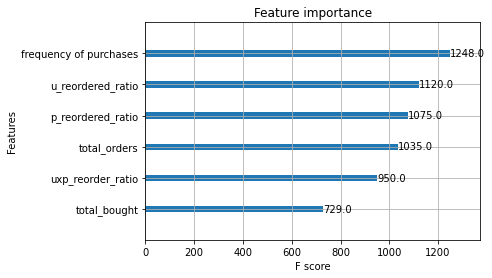

In [110]:
xgb.plot_importance(model)

In [125]:
model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'approx',
 'validate_parameters': 1,
 'verbosity': None,
 'parameters': {'eval_metric': 'logloss',
  'max_depth': '5',
  'colsample_bytree': '0.4',
  'subsample': '0.75'},
 'num_boost_round': 10}

In [127]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [128]:
paramGrid = {'max_depth':[5,10],
            'colsample_bytree':[0.3, 0.4]}  

In [129]:
xgbc = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', num_boost_round=10)

In [132]:
gridsearch = GridSearchCV(xgbc, paramGrid, cv=3, verbose=2, n_jobs=-1)

In [133]:
model = gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost

[19:45:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................colsample_bytree=0.3, max_depth=5; total time=12.0min
[19:56:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................colsample_bytree=0.4, max_dept

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost

[19:45:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................colsample_bytree=0.3, max_depth=5; total time=12.0min
[19:56:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END .................colsample_bytree=0.3, max_depth

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost

[19:45:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END .................colsample_bytree=0.3, max_depth=10; total time=17.5min
[20:02:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END ..................colsample_bytree=0.4, max_dept

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/xgboost

In [135]:
print("The best parameters are: /n",  gridsearch.best_params_)

The best parameters are: /n {'colsample_bytree': 0.4, 'max_depth': 5}


In [136]:
model = gridsearch.best_estimator_

In [137]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.4,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'approx',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss',
 'num_boost_round': 10}

In [139]:
prediction_test = model.predict(df_test).astype(int)

In [140]:
prediction_test

array([1, 1, 1, ..., 0, 0, 0])

In [143]:
df_test['prediction'] = prediction_test
df_test

total_bought  uxp_reorder_ratio  total_orders  \
user_id product_id                                                  
3       39190                 10           0.833333            12   
        47766                  9           0.750000            12   
        21903                  8           0.666667            12   
        9387                   5           0.416667            12   
        17668                  5           0.416667            12   
...                          ...                ...           ...   
206208  48364                  1           0.021277            49   
        48865                  1           0.125000            49   
        49247                  1           0.022727            49   
        49385                  1           0.043478            49   
        49621                  1           0.052632            49   

                    u_reordered_ratio  frequency of purchases  \
user_id product_id                                              
3       39190                0.625000                   10972   
        47766                0.625000                  176815   
        21903                0.625000                  241921   
        9387                 0.625000                   36187   
        17668                0.625000                    2110   
...                               ...                     ...   
206208  48364                0.707533                   19501   
        48865                0.707533                     802   
        49247                0.707533                    6292   
        49385                0.707533                     318   
        49621                0.707533                    4634   

                    p_reordered_ratio  prediction  
user_id product_id                                 
3       39190                0.573642           1  
        47766                0.758103           1  
        21903                0.772500           1  
        9387                 0.650427           0  
        17668                0.578199           0  
...                               ...         ...  
206208  48364                0.530127           0  
        48865                0.394015           0  
        49247                0.654641           0  
        49385                0.179245           0  
        49621                0.643505           0  

[4833292 rows x 7 columns]